<a href="https://colab.research.google.com/github/78526Nasir/Getting-Started-with-Tensorflow/blob/master/Source%20Codes/GST_mnist_dataset_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import keras
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.metrics import confusion_matrix
import tensorflow as tf
import warnings
warnings.filterwarnings("ignore")
from keras.utils.np_utils import to_categorical

In [0]:
# load the mnist dataset
# the mnist dataset contains 70,000 images
mnist = tf.keras.datasets.mnist

(x_train, y_train),(x_test, y_test) = mnist.load_data()

In [29]:
x_train[0][5]

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
        18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
         0,   0], dtype=uint8)

In [8]:
# all the images are 28x28 pixels
# 60,000 image in training and 10,000 for testing
x_train.shape, x_test.shape

((60000, 28, 28), (10000, 28, 28))

In [0]:
def display_image(img):
  plt.imshow(img, cmap = "gray")

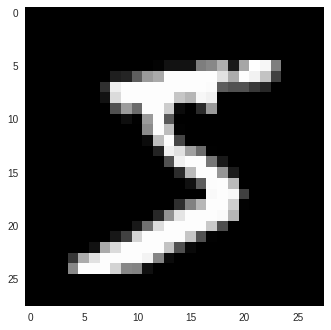

In [58]:
display_image(x_train[0])

In [59]:
y_train[0]

5

In [0]:
# model building 
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(512, activation=tf.nn.relu),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])

In [13]:
# model feeding
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

model.fit(x_train, y_train, epochs=5)

Epoch 1/5
60000/60000 [==============================] - 13s 218us/sample - loss: 13.1349 - acc: 0.1849
Epoch 2/5
60000/60000 [==============================] - 13s 209us/sample - loss: 13.1058 - acc: 0.1868
Epoch 3/5
60000/60000 [==============================] - 13s 220us/sample - loss: 13.1661 - acc: 0.1831
Epoch 4/5
60000/60000 [==============================] - 13s 217us/sample - loss: 13.0017 - acc: 0.1934
Epoch 5/5
60000/60000 [==============================] - 13s 215us/sample - loss: 13.0035 - acc: 0.1932


In [0]:
# model evaluation
model.evaluate(x_test, y_test)

> __The accuracy was too bad ! let's normalize the data.__

In [0]:
x_train, x_test = x_train / 255.0, x_test / 255.0

In [31]:
x_train[0][5]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.01176471, 0.07058824, 0.07058824,
       0.07058824, 0.49411765, 0.53333333, 0.68627451, 0.10196078,
       0.65098039, 1.        , 0.96862745, 0.49803922, 0.        ,
       0.        , 0.        , 0.        ])

In [32]:
# feeded new normalized dataset into the model
model.fit(x_train, y_train, epochs=5)

Epoch 1/5
60000/60000 [==============================] - 13s 221us/sample - loss: 0.2905 - acc: 0.9274
Epoch 2/5
60000/60000 [==============================] - 12s 207us/sample - loss: 0.1070 - acc: 0.9676
Epoch 3/5
60000/60000 [==============================] - 12s 201us/sample - loss: 0.0775 - acc: 0.9761
Epoch 4/5
60000/60000 [==============================] - 12s 203us/sample - loss: 0.0611 - acc: 0.9807
Epoch 5/5
60000/60000 [==============================] - 12s 207us/sample - loss: 0.0491 - acc: 0.9843


In [0]:
pred = model.predict(x_test)

In [63]:
pred[0]

array([1.07475053e-07, 1.13211285e-09, 3.69185250e-06, 1.07554675e-04,
       4.90602838e-13, 6.51905196e-08, 1.91303462e-12, 9.99885559e-01,
       8.06866183e-08, 2.94035181e-06], dtype=float32)

In [0]:
# select the indix with the maximum probability
results = np.argmax(pred, axis = 1)

In [104]:
results

array([7, 2, 1, ..., 4, 5, 6])

In [105]:
cm = confusion_matrix(results, y_test)
cm

array([[ 971,    0,    2,    0,    1,    2,    7,    1,    4,    1],
       [   1, 1125,    1,    0,    0,    0,    3,    3,    0,    2],
       [   1,    5, 1019,    7,    4,    0,    1,   15,    6,    0],
       [   0,    1,    2,  993,    0,   11,    1,    1,    5,    2],
       [   2,    0,    2,    0,  961,    2,    9,    0,    3,    8],
       [   1,    0,    0,    1,    0,  870,    4,    0,    3,    2],
       [   1,    1,    0,    0,    2,    1,  928,    0,    1,    0],
       [   0,    0,    2,    1,    1,    0,    0,  997,    2,    3],
       [   1,    3,    4,    1,    1,    3,    3,    2,  946,    0],
       [   2,    0,    0,    7,   12,    3,    2,    9,    4,  991]])

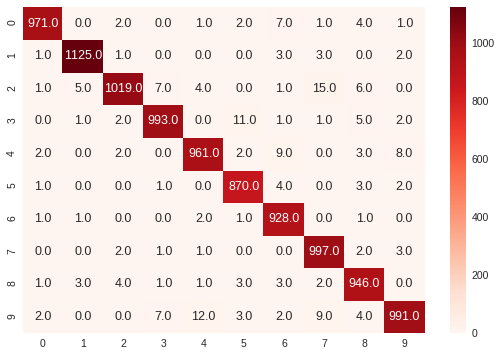

In [123]:
sns.set_context('paper', font_scale=1.3)

plt.figure(figsize=(9, 6))
sns.heatmap(cm, annot=True, fmt=".1f", cmap="Reds")

In [127]:
model.evaluate(x_test, y_test)

10000/10000 [==============================] - 1s 56us/sample - loss: 0.0681 - acc: 0.9801


[0.06808905268576927, 0.9801]

>__Let's try to reach the accuracy to 100% by increasing the epoch size.__

In [128]:
model.fit(x_train, y_train, epochs=50)

Epoch 1/50
60000/60000 [==============================] - 13s 222us/sample - loss: 0.0408 - acc: 0.9866
Epoch 2/50
60000/60000 [==============================] - 13s 220us/sample - loss: 0.0355 - acc: 0.9880
Epoch 3/50
60000/60000 [==============================] - 13s 225us/sample - loss: 0.0292 - acc: 0.9902
Epoch 4/50
60000/60000 [==============================] - 13s 220us/sample - loss: 0.0269 - acc: 0.9912
Epoch 5/50
60000/60000 [==============================] - 13s 224us/sample - loss: 0.0229 - acc: 0.9920
Epoch 6/50
60000/60000 [==============================] - 13s 223us/sample - loss: 0.0207 - acc: 0.9924
Epoch 7/50
60000/60000 [==============================] - 13s 225us/sample - loss: 0.0211 - acc: 0.9926
Epoch 8/50
60000/60000 [==============================] - 13s 216us/sample - loss: 0.0190 - acc: 0.9937
Epoch 9/50
60000/60000 [==============================] - 13s 219us/sample - loss: 0.0182 - acc: 0.9940
Epoch 10/50
60000/60000 [==============================] - 13s 2

In [129]:
model.evaluate(x_test, y_test)

10000/10000 [==============================] - 1s 56us/sample - loss: 0.1169 - acc: 0.9826


[0.11690978439851024, 0.9826]

In [0]:
pred = model.predict(x_test)

In [0]:
results = pred.argmax(axis=1)

In [135]:
cm = confusion_matrix(results, y_test)
cm

array([[ 975,    0,    4,    0,    1,    3,    3,    2,    0,    2],
       [   1, 1128,    2,    0,    1,    0,    3,    3,    0,    3],
       [   1,    3, 1013,    2,    5,    0,    1,    8,    5,    0],
       [   1,    0,    4,  999,    0,   11,    1,    1,    7,    5],
       [   0,    0,    1,    0,  967,    2,    3,    1,    4,    5],
       [   0,    1,    0,    2,    0,  863,    3,    0,    1,    2],
       [   0,    1,    0,    0,    1,    6,  942,    0,    1,    0],
       [   1,    0,    4,    2,    0,    1,    0, 1000,    2,    1],
       [   1,    2,    3,    2,    0,    4,    2,    7,  950,    2],
       [   0,    0,    1,    3,    7,    2,    0,    6,    4,  989]])

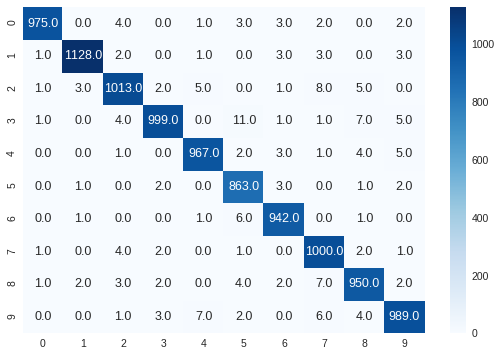

In [137]:
sns.set_context('paper', font_scale=1.3)

plt.figure(figsize=(9, 6))
sns.heatmap(cm, annot=True, fmt=".1f", cmap="Blues")